### Importing Libraries

In [26]:
import tweepy
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud


### Importing API Key

In [27]:
import os
from dotenv import load_dotenv

load_dotenv()

# Access the keys
API_KEY = os.getenv("API_KEY")
API_SECRET_KEY = os.getenv("API_SECRET_KEY")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")

### Creating API Object

In [28]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)


### Creating the Dataset

In [29]:
# search_query = "depression OR suicide OR anxiety OR selfharm OR hopeless -filter:retweets"
# tweet_count = 500

# tweets = tweepy.Cursor(api.search_tweets, q=search_query, lang="en", tweet_mode="extended").items(tweet_count)

# tweet_list = []
# for tweet in tweets:
#     tweet_list.append(tweet.full_text)

# df = pd.DataFrame(tweet_list, columns=["Tweet"])
# df.head()


In [30]:
df = pd.read_csv('reddit_depression_suicidewatch.csv')  

df = df.rename(columns={'text': 'Tweet'})  

df.head()

,Tweet
0,I recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ..."
2,"So I have been with my bf for 5 months , and h..."
3,I am so exhausted of this. Just when I think I...
4,I have been severly bullied since i was 5 till...


### Preprocessing

In [31]:
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  
    text = re.sub(r"@\w+|\#", "", text)  
    text = re.sub(r"[^\w\s]", "", text)  
    text = re.sub(r"\d+", "", text)  
    text = text.lower()  
    return text

df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)
df.head()


,Tweet,Cleaned_Tweet
0,I recently went through a breakup and she said...,i recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ...",i do not know how to navigate these feelings n...
2,"So I have been with my bf for 5 months , and h...",so i have been with my bf for months and he ...
3,I am so exhausted of this. Just when I think I...,i am so exhausted of this just when i think i ...
4,I have been severly bullied since i was 5 till...,i have been severly bullied since i was till ...


### Tokenizing and Removing Stop Words

In [46]:
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def tokenize_text(text):
    words = TextBlob(text).words  
    return [word.lower() for word in words if word.lower() not in stop_words]  

df["Tokenized_Tweet"] = df["Cleaned_Tweet"].apply(tokenize_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Cleaned_Tweet,Tokenized_Tweet,Filtered_Tokens,Processed_Tweet
0,I recently went through a breakup and she said...,i recently went through a breakup and she said...,"[recently, went, breakup, said, still, wants, ...","[recently, went, breakup, said, still, wants, ...",i recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ...",i do not know how to navigate these feelings n...,"[know, navigate, feelings, new, feeling, stret...","[know, navigate, feelings, new, feeling, stret...",i do not know how to navigate these feelings n...
2,"So I have been with my bf for 5 months , and h...",so i have been with my bf for months and he ...,"[bf, months, already, told, depressed, week, n...","[bf, months, already, told, depressed, week, n...",so i have been with my bf for months and he al...
3,I am so exhausted of this. Just when I think I...,i am so exhausted of this just when i think i ...,"[exhausted, think, finally, rest, think, maybe...","[exhausted, think, finally, rest, think, maybe...",i am so exhausted of this just when i think i ...
4,I have been severly bullied since i was 5 till...,i have been severly bullied since i was till ...,"[severly, bullied, since, till, resulted, depr...","[severly, bullied, since, till, resulted, depr...",i have been severly bullied since i was till t...


### Identifying most common words for Lexicon

In [47]:
all_words = [word for tokens in df["Tokenized_Tweet"] for word in tokens]

word_freq = Counter(all_words)
common_words = word_freq.most_common(50)  

word_df = pd.DataFrame(common_words, columns=["Word", "Count"])

word_df.head(20)

,Word,Count
0,like,22333
1,want,19494
2,feel,19438
3,life,15501
4,know,14306
5,get,12214
6,even,11727
7,would,11321
8,people,10201
9,time,9819


In [48]:
from nltk.corpus import stopwords
import nltk
from collections import Counter
import pandas as pd

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

df["Filtered_Tokens"] = df["Tokenized_Tweet"].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

all_words = [word for tokens in df["Filtered_Tokens"] for word in tokens]
word_freq = Counter(all_words)

common_words = word_freq.most_common(50)

word_df = pd.DataFrame(common_words, columns=["Word", "Count"])
word_df.head(60)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Count
0,like,22333
1,want,19494
2,feel,19438
3,life,15501
4,know,14306
5,get,12214
6,even,11727
7,would,11321
8,people,10201
9,time,9819


### Word Cloud Visualization

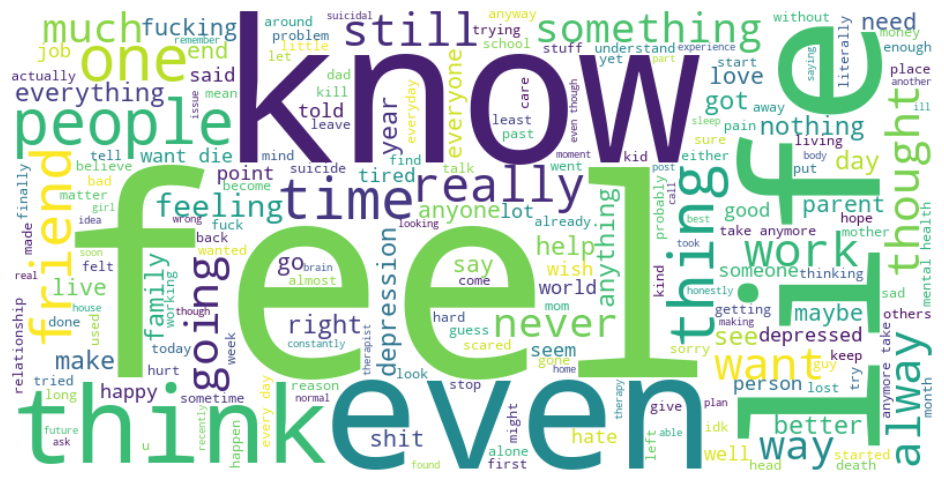

In [51]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Converting to Bag of Words and Training the LDA model

In [52]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df["Processed_Tweet"] = df["Tokenized_Tweet"].apply(lambda x: " ".join(x))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Processed_Tweet"])

lda_model = LatentDirichletAllocation(n_components=3, random_state=42, max_iter=10)
lda_model.fit(X)

words = np.array(vectorizer.get_feature_names_out())

for topic_idx, topic in enumerate(lda_model.components_):
    top_words = words[np.argsort(topic)][-20:]  
    print(f"Topic {topic_idx}: {' '.join(top_words)}")


Topic 0: live never much going one think get hate take fucking would die even know anymore people feel like life want
Topic 1: feeling going go anything day friends things really job people want depression know time work even life get feel like
Topic 2: think back go got could never years going one life help even really get time feel want know would like
